In [ ]:
!nvidia-smi -L

GPU 0: Tesla T4 (UUID: GPU-3ead298e-5a8e-f68c-fe40-4b80bd81a7dd)


In [ ]:
from google.colab import drive
drive.mount('drive')

Drive already mounted at drive; to attempt to forcibly remount, call drive.mount("drive", force_remount=True).


In [ ]:
%%capture
!pip install transformers

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

import torch
from torch.utils.data import Dataset, DataLoader

In [ ]:
train_data = pd.read_csv("drive/MyDrive/Internship/datasets/Goud/train_preprocessed.csv")
val_data = pd.read_csv("drive/MyDrive/Internship/datasets/Goud/validation_preprocessed.csv")
test_data = pd.read_csv("drive/MyDrive/Internship/datasets/Goud/test_preprocessed.csv")

In [ ]:
train_data

,headline,categories
0,حكم ضد وزارة اعمارة بتعويض قدره مليار لشركة,"('جورنالات بلادي',)"
1,جلسة خاصة بين مدرب الأهلي ومهاجم الأسود أزارو,"('كود سبور',)"
2,اعتقال مهاجم الريال رونالدو في فرنسا وها علاش...,"('كود سبور',)"
3,الأسود المحليين يستعدون للمربع الذهبي,"('كود سبور',)"
4,الجديد ريحة ديال المازوط وليصونس لعشاق صوكان ...,"('تبركيك',)"
...,...,...
62005,واش دخلو الصهد امحند العنصر ل كود مزال مقرر...,"('تبركيك',)"
62006,الفنانة المغربية ابتسام تسكت مطلوبة بوجدة‏,"('الزين والحداكة',)"
62007,من بعد العام تصوير تتمة فيلم ماروك لي كان ...,"('ميديا وثقافة',)"
62008,جورنالات بلادي غموض يلف صرف ملايير بمؤسسة ال...,"('جورنالات بلادي',)"


In [ ]:
val_data

,headline,categories
0,خنيفرة الحبس و الخطية لراپور متهم بإهانة موظف,"('آش واقع',)"
1,مشات تقلد كارديشيان ممثلة تصاب بفشل كلوي بسبب...,"('تبركيك',)"
2,إشبيلية يطارد الدولي المغربي أمرابط,"('كود سبور',)"
3,في عيد المرأة تعلمي ماتخافيش من جمالك راه جسد...,"('آراء',)"
4,زوجة عسكري في الصحراء تنتحر شنقا في خينفرة,"('آش واقع',)"
...,...,...
4132,سعد لمجرد كيحاول يمحي صورة المغتصب ويبين انسان...,"('تبركيك',)"
4133,جورنالات بلادي مسؤول رفضو التصريح بالممتلكات ...,"('جورنالات بلادي',)"
4134,الخلفي موقف رئيس الحكومة من تقاعد البرلمانيين...,"('آش واقع',)"
4135,ومن الحب ما قتل هندي انتاحر في لايف على فيسب...,"('تبركيك',)"


In [ ]:
test_data

,headline,categories
0,التخلف باقي فالمجتمع البخور وهياكل الموتى و ب...,"('جورنالات بلادي',)"
1,ف زمان كورونا كونصير د الروك تدار ف برشلونة ح...,"('ميديا وثقافة',)"
2,كيم كارداشيان تعرات عاوتاني صور,"('تبركيك',)"
3,نقابتا الاتحاد والفيدرالية دخلو صحاح فوزارة أن...,"('آش واقع',)"
4,ادارية الرباط لشركة صوماجيك فطنجة ممنوع من هن...,"('آش واقع',)"
...,...,...
4109,مزاد علني فيه رسائل مارسيل بروست فشل رسالة مد...,"('ميديا وثقافة',)"
4110,سكوب صافي كلشي توقع صفقة القرن اللي دارها مو...,"('تبركيك',)"
4111,الكسال اللي شرمل هولندية بفاس مولوع بمؤخرات ال...,"('تبركيك',)"
4112,بنكيران يصارع لتقليص لائحة قيادي الحزب المعتذر...,"('آش واقع',)"


In [ ]:
train_data["categories"].unique()

array(["('جورنالات بلادي',)", "('كود سبور',)", "('تبركيك',)", "('آراء',)",
       "('آش واقع',)", "('ميديا وثقافة',)", "('الزين والحداكة',)"],
      dtype=object)

In [ ]:
val_data["categories"].unique()

array(["('آش واقع',)", "('تبركيك',)", "('كود سبور',)", "('آراء',)",
       "('ميديا وثقافة',)", "('جورنالات بلادي',)", "('الزين والحداكة',)"],
      dtype=object)

In [ ]:
test_data["categories"].unique()

array(["('جورنالات بلادي',)", "('ميديا وثقافة',)", "('تبركيك',)",
       "('آش واقع',)", "('كود سبور',)", "('آراء',)",
       "('الزين والحداكة',)"], dtype=object)

In [ ]:
def categ2label(categ):
  labels_dict = {
      "('جورنالات بلادي',)" : 0,
      "('كود سبور',)" : 1,
      "('تبركيك',)" : 2,
      "('آراء',)" : 3,
      "('آش واقع',)" : 4,
      "('ميديا وثقافة',)" : 5,
      "('الزين والحداكة',)" : 6,
  }
  return labels_dict[categ]

In [ ]:
train_data["label"] = train_data["categories"].apply(categ2label)
val_data["label"] = val_data["categories"].apply(categ2label)
test_data["label"] = test_data["categories"].apply(categ2label)

In [ ]:
train_data

,headline,categories,label
0,حكم ضد وزارة اعمارة بتعويض قدره مليار لشركة,"('جورنالات بلادي',)",0
1,جلسة خاصة بين مدرب الأهلي ومهاجم الأسود أزارو,"('كود سبور',)",1
2,اعتقال مهاجم الريال رونالدو في فرنسا وها علاش...,"('كود سبور',)",1
3,الأسود المحليين يستعدون للمربع الذهبي,"('كود سبور',)",1
4,الجديد ريحة ديال المازوط وليصونس لعشاق صوكان ...,"('تبركيك',)",2
...,...,...,...
62005,واش دخلو الصهد امحند العنصر ل كود مزال مقرر...,"('تبركيك',)",2
62006,الفنانة المغربية ابتسام تسكت مطلوبة بوجدة‏,"('الزين والحداكة',)",6
62007,من بعد العام تصوير تتمة فيلم ماروك لي كان ...,"('ميديا وثقافة',)",5
62008,جورنالات بلادي غموض يلف صرف ملايير بمؤسسة ال...,"('جورنالات بلادي',)",0


In [ ]:
val_data

,headline,categories,label
0,خنيفرة الحبس و الخطية لراپور متهم بإهانة موظف,"('آش واقع',)",4
1,مشات تقلد كارديشيان ممثلة تصاب بفشل كلوي بسبب...,"('تبركيك',)",2
2,إشبيلية يطارد الدولي المغربي أمرابط,"('كود سبور',)",1
3,في عيد المرأة تعلمي ماتخافيش من جمالك راه جسد...,"('آراء',)",3
4,زوجة عسكري في الصحراء تنتحر شنقا في خينفرة,"('آش واقع',)",4
...,...,...,...
4132,سعد لمجرد كيحاول يمحي صورة المغتصب ويبين انسان...,"('تبركيك',)",2
4133,جورنالات بلادي مسؤول رفضو التصريح بالممتلكات ...,"('جورنالات بلادي',)",0
4134,الخلفي موقف رئيس الحكومة من تقاعد البرلمانيين...,"('آش واقع',)",4
4135,ومن الحب ما قتل هندي انتاحر في لايف على فيسب...,"('تبركيك',)",2


In [ ]:
test_data

,headline,categories,label
0,التخلف باقي فالمجتمع البخور وهياكل الموتى و ب...,"('جورنالات بلادي',)",0
1,ف زمان كورونا كونصير د الروك تدار ف برشلونة ح...,"('ميديا وثقافة',)",5
2,كيم كارداشيان تعرات عاوتاني صور,"('تبركيك',)",2
3,نقابتا الاتحاد والفيدرالية دخلو صحاح فوزارة أن...,"('آش واقع',)",4
4,ادارية الرباط لشركة صوماجيك فطنجة ممنوع من هن...,"('آش واقع',)",4
...,...,...,...
4109,مزاد علني فيه رسائل مارسيل بروست فشل رسالة مد...,"('ميديا وثقافة',)",5
4110,سكوب صافي كلشي توقع صفقة القرن اللي دارها مو...,"('تبركيك',)",2
4111,الكسال اللي شرمل هولندية بفاس مولوع بمؤخرات ال...,"('تبركيك',)",2
4112,بنكيران يصارع لتقليص لائحة قيادي الحزب المعتذر...,"('آش واقع',)",4


In [ ]:
# train_headlines, temp_headlines, train_labels, temp_labels = train_test_split(train_data['headline'], train_data['label'], random_state=42, 
#                                                                     test_size=0.2)

# val_headlines, test_headlines, val_labels, test_labels = train_test_split(temp_headlines, temp_labels, random_state=42, 
#                                                                 test_size=0.5)

In [ ]:
train_headlines = train_data["headline"]
train_labels = train_data["label"]
val_headlines = val_data["headline"]
val_labels = val_data["label"]
test_headlines = test_data["headline"]
test_labels = test_data["label"]

In [ ]:
%%capture
from transformers import BertTokenizerFast, AutoModelForSequenceClassification, Trainer, TrainingArguments
DarijaBERT_tokenizer = BertTokenizerFast.from_pretrained("Kamel/DarijaBERT")

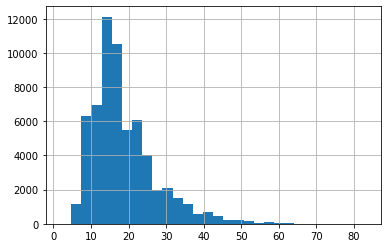

In [ ]:
seq_len = [len(DarijaBERT_tokenizer.encode(i)) for i in train_headlines]

pd.Series(seq_len).hist(bins = 30)

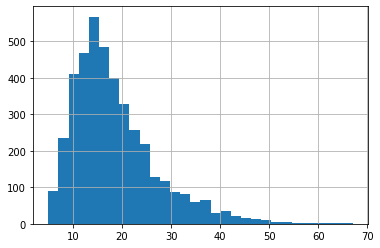

In [ ]:
seq_len = [len(DarijaBERT_tokenizer.encode(i)) for i in val_headlines]

pd.Series(seq_len).hist(bins = 30)

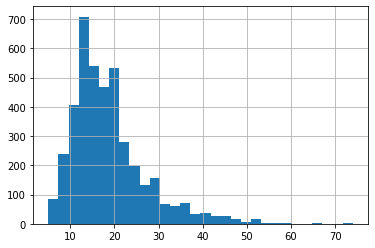

In [ ]:
seq_len = [len(DarijaBERT_tokenizer.encode(i)) for i in test_headlines]

pd.Series(seq_len).hist(bins = 30)

In [ ]:
max_seq_len = 40

train_encodings = DarijaBERT_tokenizer(train_headlines.to_list(), truncation=True, padding=True, max_length=max_seq_len)
val_encodings = DarijaBERT_tokenizer(val_headlines.to_list(), truncation=True, padding=True, max_length=max_seq_len)
test_encodings = DarijaBERT_tokenizer(test_headlines.to_list(), truncation=True, padding=True, max_length=max_seq_len)

In [ ]:
class ArticleDataset(Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels.to_list()

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.labels)

train_dataset = ArticleDataset(train_encodings, train_labels)
val_dataset = ArticleDataset(val_encodings, val_labels)
test_dataset = ArticleDataset(test_encodings, test_labels)

In [ ]:
from sklearn.metrics import precision_recall_fscore_support, accuracy_score

def compute_metrics(pred):
    labels = pred.label_ids
    preds = pred.predictions.argmax(-1)
    precision, recall, f1, _ = precision_recall_fscore_support(labels, preds, average='weighted')
    acc = accuracy_score(labels, preds)
    return {
        'accuracy': acc,
        'f1': f1,
        'precision': precision,
        'recall': recall
    }

In [ ]:
%%capture
model = AutoModelForSequenceClassification.from_pretrained("Kamel/DarijaBERT", num_labels=7)

In [ ]:
training_args = TrainingArguments(
    output_dir='drive/MyDrive/Internship/code/results',          # output directory
    num_train_epochs=5,             # total number of training epochs
    per_device_train_batch_size=16,  # batch size per device during training
    per_device_eval_batch_size=32,   # batch size for evaluation
    warmup_steps=500,                # number of warmup steps for learning rate scheduler
    weight_decay=0.01,               # strength of weight decay
    evaluation_strategy='epoch',     # evaluate at the end of each epoch
    logging_strategy='epoch',        # log at the end of each epoch
    save_strategy='epoch', 
    overwrite_output_dir=True,
    save_total_limit=3,
    seed=42,
    data_seed=42,
    learning_rate=5e-5
    )

trainer = Trainer(
    model=model,                         # the instantiated Transformers model 
    args=training_args,                  # training arguments
    train_dataset=train_dataset,         # training dataset
    eval_dataset=val_dataset,            # evaluation dataset
    compute_metrics=compute_metrics      # method we defined before to compute our metrics
    )

In [ ]:
trainer.train()

/usr/local/lib/python3.7/dist-packages/transformers/optimization.py:309: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  FutureWarning,


Epoch,Training Loss,Validation Loss


In [ ]:
trainer.predict(test_dataset)

PredictionOutput(predictions=array([[ 1.1458807 , -3.3617394 ,  1.6744573 , ..., -0.7443187 ,
        -0.02080577, -0.26602623],
       [-2.7546647 , -0.46017438,  5.7265472 , ..., -1.652565  ,
         3.1625903 , -1.3805037 ],
       [-1.6722606 , -1.2176899 ,  1.4472113 , ..., -1.5403376 ,
        -2.2409687 ,  7.087922  ],
       ...,
       [-2.4607255 , -0.93333274,  7.0617476 , ...,  0.865299  ,
        -1.0599247 ,  0.6422957 ],
       [-1.8336549 , -2.3131764 ,  2.9398181 , ...,  6.525682  ,
        -0.53080034, -1.2174951 ],
       [ 7.12418   , -0.5554718 , -1.5619249 , ...,  1.8706381 ,
        -2.0360217 , -1.0646751 ]], dtype=float32), label_ids=array([0, 5, 2, ..., 2, 4, 4]), metrics={'test_loss': 1.0203490257263184, 'test_accuracy': 0.7447739426349052, 'test_f1': 0.7448503678742122, 'test_precision': 0.746516315467987, 'test_recall': 0.7447739426349052, 'test_runtime': 8.9025, 'test_samples_per_second': 462.116, 'test_steps_per_second': 7.301})